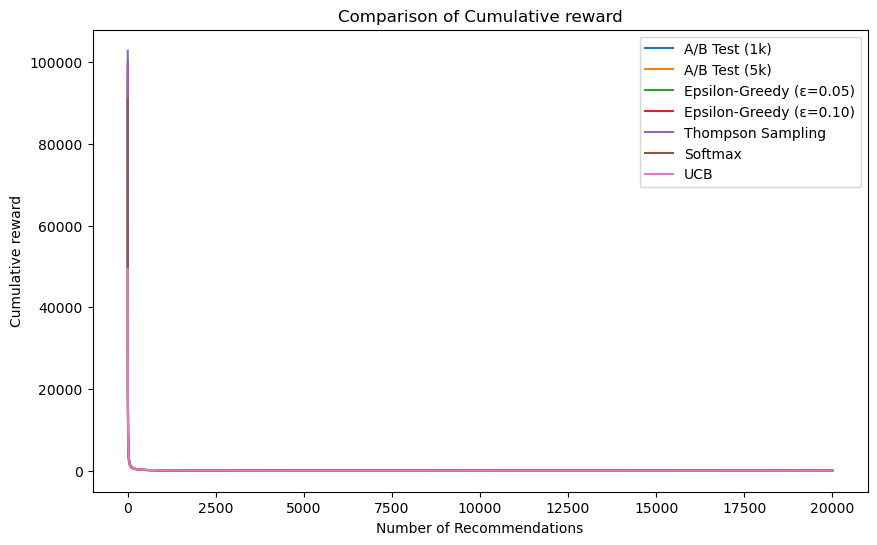

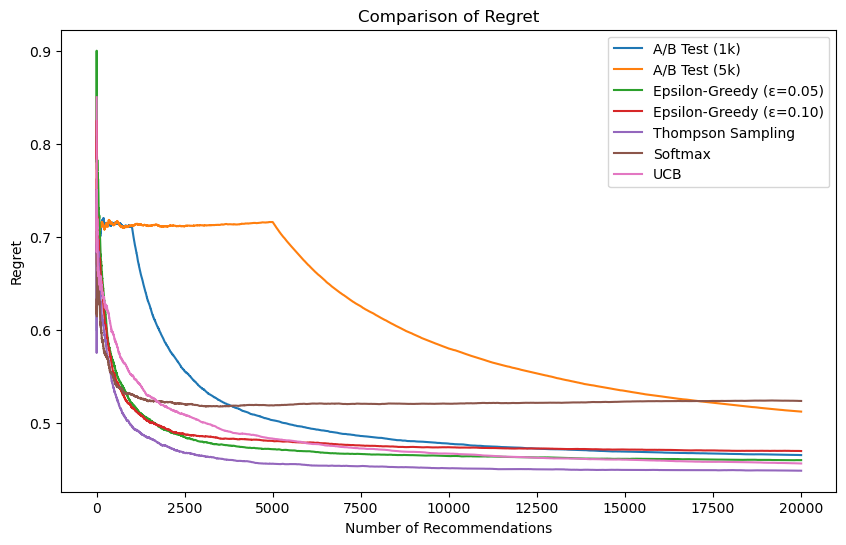

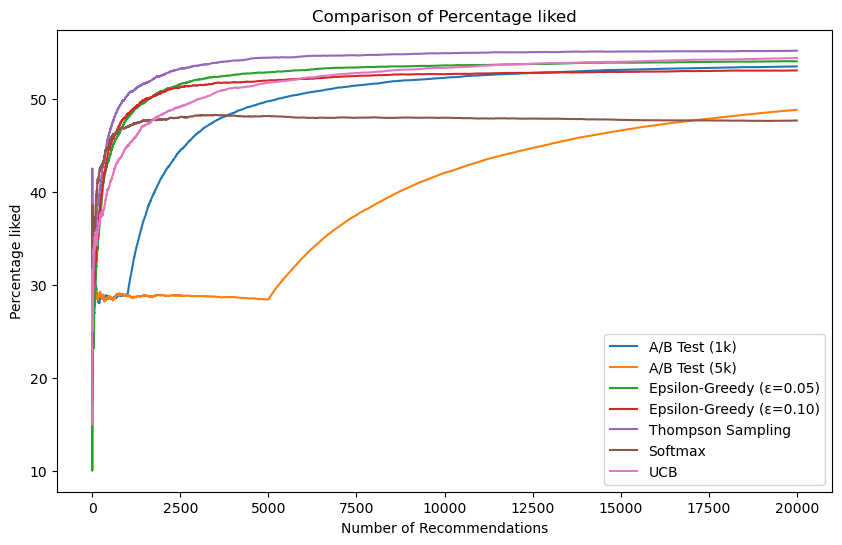

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Paths to output files
output_files = {
    "A/B Test (1k)": "output/ab_test_1k.csv",
    "A/B Test (5k)": "output/ab_test_5k.csv",
    "Epsilon-Greedy (ε=0.05)": "output/epsilon_greedy_05.csv",
    "Epsilon-Greedy (ε=0.10)": "output/epsilon_greedy_10.csv",
    "Thompson Sampling": "output/thompson_sampling.csv",
    "Softmax": "output/softmax.csv",
    "UCB": "output/ucb.csv"
}

# Load results from files
results = {}
for name, path in output_files.items():
    try:
        df = pd.read_csv(path)
        results[name] = df
    except FileNotFoundError:
        print(f"File not found: {path}")

def calculate_metrics(df):
    # Calculate the running sum of rewards as cumulative reward
    df['cumulative_reward'] = df['fraction_relevant'].cumsum()
    
    # Calculate regret (assuming "fraction_relevant" = reward fraction)
    df['regret'] = 1 - df['fraction_relevant']
    
    # Convert fraction of relevant recommendations to percentage
    df['percentage_liked'] = df['fraction_relevant'] * 100
    
    return df


# Calculate metrics for each algorithm
for name in results:
    results[name] = calculate_metrics(results[name])

# Average results over visits for all algorithms
averaged_results = {}
for name, df in results.items():
    averaged_results[name] = df.groupby('visit', as_index=False).mean()

def plot_metrics(averaged_results, metrics):
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        for name, avg_df in averaged_results.items():
            if metric in avg_df.columns:
                plt.plot(avg_df['visit'], avg_df[metric], label=name)
        plt.title(f"Comparison of {metric.replace('_', ' ').capitalize()}")
        plt.xlabel("Number of Recommendations")
        plt.ylabel(metric.replace('_', ' ').capitalize())
        plt.legend()
        plt.show()

# Metrics to plot
metrics = ['cumulative_reward', 'regret', 'percentage_liked']

# Plot using the averaged data
plot_metrics(averaged_results, metrics)
